## Defining signal/noise regions, weighting arrays etc ##


### Tiff's notes ###
 - Example shown for 2nd order power-law. The weighting array is a very simple signal/noise region - this won't give the best results!
 - Many different sets of weighting arrays can be generated for a single target; these will be saved in their own folders to keep things clear and avoiding the need for replicating definitions. Make sure that all parameters required to reproduce the array are saved - either in the folder name or (probably neater) in a separate text file (have separate files for weighting arrays, cost functions used etc, or combine as one? Have separate for now, though might be nice to combine at some point?). As weighting arrays get more complicated, try to find a neat way of storing all this information!
 - It would probably be useful to extend this to create different weighting arrays for different cost function terms. This should be very straightforward, but try to keep everything organised otherwise it will quickly become confusing!
 - Although a range of weighting arrays will be used, most will probably be based quite heavily on the target: might be useful to define params from the information given in targetdir.
 - For even just slightly more complicated weighting arrays than this, will need to organise much more clearly - probably use text file for this.
 - Weighting-Target plot just to check that weighting array looks sensible! There's probably a better way of representing this!
 - Have separated into multiple notebooks to make things clearer, but does involve a bit more copying and pasting of directory names etc - may be more straightforward to move this into the cost function definition of phase_calculation (or to move cost function definition here?)

### Preamble; plot definitions ###

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

def quick_plot(weighting, target):
    N = target.shape[0]
    
    plot_args = {'extent': [0, N, 0, N],
                 'interpolation': 'None',
                 'origin': 'lower'}
    fig, axes = plt.subplots(ncols=2)
    axes[0].imshow(weighting, **plot_args)
    axes[0].set_title('Cost function weighting')
    axes[1].imshow(weighting - target, **plot_args)
    axes[1].set_title('Weighting array - Target')

### Load target ###

In [2]:
targetdir = '../initialisation/example_power2_512_(350,350)_64/'
targetname = os.path.join(targetdir, 'target.dat')

t = np.loadtxt(targetname)

### Weighting array ###


Saved weighting array to ../initialisation/example_power2_512_(350,350)_64/weighting_border_16_noise_1e-06/weight.dat
Saved weighting (active smoothing) array to ../initialisation/example_power2_512_(350,350)_64/weighting_border_16_noise_1e-06/weight_as.dat


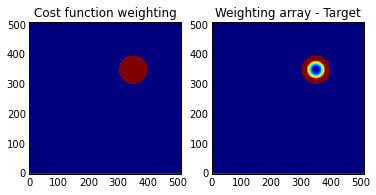

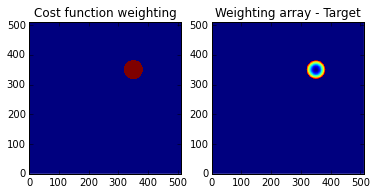

In [3]:
def make_weighting(n, r0, d, b, s):
    """
    Create n x n weighting array: 
    Pattern centre r0, diameter d defined by target;
    Border b gives number of pixels between the edge of the trapping pattern and start of noise region
    As a simple example, just have a step change between flat signal region with amplitude 1
    and noise region with amplitude s relative to this.
    """
    x = np.array(range(n))*1.
    X, Y = np.meshgrid(x, x)
    
    delta_r2 = np.power(X - r0[0], 2) + np.power(Y - r0[1], 2)
    z = np.ones((n, n))
    z[delta_r2 > (b + d/2)**2] = s
    
    # for active smoothing:
    z_as = np.ones((n, n))
    z_as[delta_r2 > (d/2)**2] = 0
    
    return z, z_as


params = {'n': 512,
          'r0': (350, 350),
          'd': 64,
          'b': 16,
          's': 1E-6}

w, w_as = make_weighting(**params)


newdir = os.path.join(targetdir, 'weighting_border_{b}_noise_{s}/'.format(**params))
if not os.path.exists(newdir):
    os.makedirs(newdir)

filename = os.path.join(newdir, 'weight.dat')
#txtname = os.path.join(targetdir, 'weight_notes.txt')

quick_plot(w, t)
np.savetxt(filename, w)

print 'Saved weighting array to ' + filename

filename = os.path.join(newdir, 'weight_as.dat')
quick_plot(w_as, t)
np.savetxt(filename, w_as)

print 'Saved weighting (active smoothing) array to ' + filename